# 5. Machine Learning Contd.

## In-Depth: Decision Trees and Random Forests

### CREATING A DECISION TREE

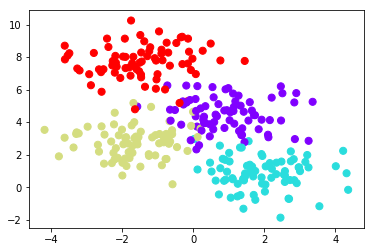

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [20]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    print(xlim)
    ylim = ax.get_ylim()
    print(ylim)
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                        np.linspace(*ylim, num=200))
    
    print(xx.shape)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                          levels=np.arange(n_classes + 1) - 0.5,
                          cmap=cmap, clim=(y.min(), y.max()),
                          zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [22]:
np.unique(y)

array([0, 1, 2, 3])

(-4.6223371064746015, 4.7954450743727755)
(-2.494925513419171, 10.867910112115798)
(200, 200)


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


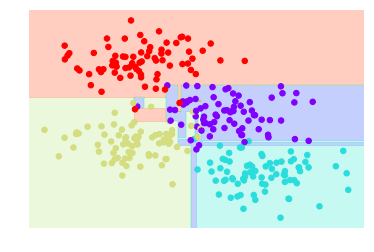

In [21]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [16]:
np.linspace(*(-4.6223371064746015, 4.7954450743727755), num=200)

array([-4.62233711, -4.57501157, -4.52768603, -4.48036049, -4.43303495,
       -4.38570941, -4.33838387, -4.29105834, -4.2437328 , -4.19640726,
       -4.14908172, -4.10175618, -4.05443064, -4.0071051 , -3.95977957,
       -3.91245403, -3.86512849, -3.81780295, -3.77047741, -3.72315187,
       -3.67582633, -3.6285008 , -3.58117526, -3.53384972, -3.48652418,
       -3.43919864, -3.3918731 , -3.34454756, -3.29722203, -3.24989649,
       -3.20257095, -3.15524541, -3.10791987, -3.06059433, -3.01326879,
       -2.96594326, -2.91861772, -2.87129218, -2.82396664, -2.7766411 ,
       -2.72931556, -2.68199002, -2.63466449, -2.58733895, -2.54001341,
       -2.49268787, -2.44536233, -2.39803679, -2.35071125, -2.30338572,
       -2.25606018, -2.20873464, -2.1614091 , -2.11408356, -2.06675802,
       -2.01943248, -1.97210695, -1.92478141, -1.87745587, -1.83013033,
       -1.78280479, -1.73547925, -1.68815371, -1.64082817, -1.59350264,
       -1.5461771 , -1.49885156, -1.45152602, -1.40420048, -1.35

### Ensembles of Estimators: Random Forests

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging.

Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which overfits the data, and averages the results to find a better classification

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(-4.6223371064746015, 4.7954450743727755)
(-2.494925513419171, 10.867910112115798)
(200, 200)


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


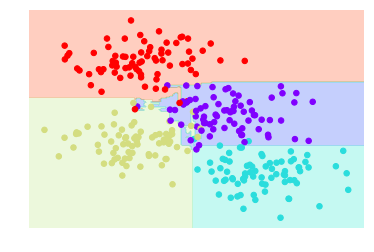

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                       random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

we have randomized the data by fitting each estimator with a random subset of 80% of the training points

(-4.6223371064746015, 4.7954450743727755)
(-2.494925513419171, 10.867910112115798)
(200, 200)


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


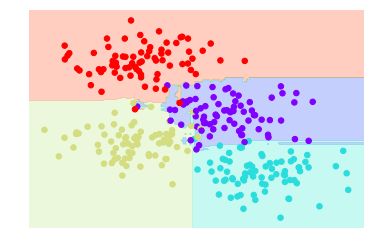

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

### Random Forest Regression

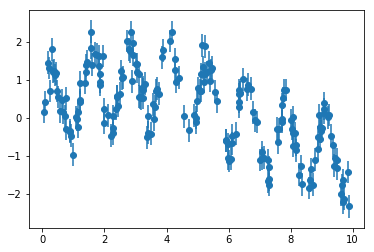

In [25]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

In [27]:
y[:10]

array([ 0.62852113, -1.32975889, -1.29849106, -1.06269677,  2.26167123,
        1.84393834,  0.16414981, -1.35485568, -1.13470733, -0.90086717])

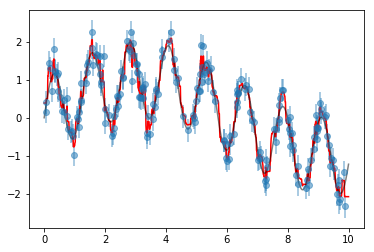

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)

yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

### Example: Random Forest for Classifying Digits

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['images', 'data', 'target_names', 'DESCR', 'target'])

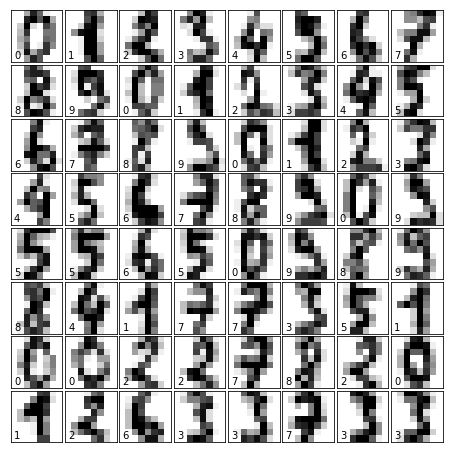

In [30]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [32]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [39]:
Xtrain.shape

(1347, 64)

In [38]:
Xtrain[:1], ytrain[:1]

(array([[ 0.,  3., 13., 16.,  9.,  0.,  0.,  0.,  0., 10., 15., 13., 15.,
          2.,  0.,  0.,  0., 15.,  4.,  4., 16.,  1.,  0.,  0.,  0.,  0.,
          0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  1., 14., 13.,  0.,  0.,
          0.,  0.,  0., 10., 16.,  5.,  0.,  0.,  0.,  0.,  4., 16., 13.,
          8., 10.,  9.,  1.,  0.,  2., 16., 16., 14., 12.,  9.,  1.]]),
 array([2]))

In [33]:
from sklearn import metrics

print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



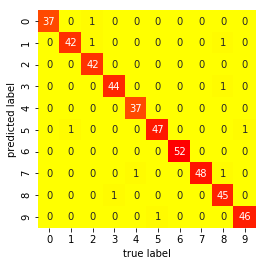

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, cmap=plt.cm.autumn_r, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

We find that a simple, untuned random forest results in a very accurate classification of the digits data.

In [43]:
# View feature importances
model.feature_importances_

array([0.00000000e+00, 2.60191488e-03, 2.01784400e-02, 1.04356652e-02,
       9.28224578e-03, 2.00304907e-02, 8.40778431e-03, 6.44549801e-04,
       5.99909871e-05, 1.08661486e-02, 2.72894846e-02, 7.23837487e-03,
       1.57060934e-02, 2.95338172e-02, 5.39873048e-03, 5.26244195e-04,
       3.50641383e-05, 7.75320893e-03, 2.13788198e-02, 2.46454780e-02,
       2.96942532e-02, 4.92121329e-02, 8.77563169e-03, 3.81057763e-04,
       3.87178762e-05, 1.39893139e-02, 4.19484020e-02, 2.50005517e-02,
       3.28490003e-02, 2.22484455e-02, 3.19812921e-02, 1.48898146e-05,
       0.00000000e+00, 3.09214562e-02, 2.73303341e-02, 1.80786516e-02,
       4.18694488e-02, 1.91160838e-02, 2.30962543e-02, 0.00000000e+00,
       2.96486152e-05, 1.14732643e-02, 3.52856132e-02, 4.38408936e-02,
       2.21150902e-02, 2.11898011e-02, 1.78216462e-02, 1.55995206e-04,
       4.92540827e-05, 2.64262358e-03, 1.70616818e-02, 2.09890913e-02,
       1.38026640e-02, 2.28040134e-02, 2.46418752e-02, 1.28992467e-03,
      

In [46]:
np.argmax(model.predict_proba(Xtest)[:10], axis=1)

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [47]:
ypred[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

A primary disadvantage of random forests is that the results are not easily interpretable; that is, if you would like to draw conclusions about the meaning of the classification model, random forests may not be the best choice.

## In Depth: Principal Component Analysis

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
pca.components_

array([[-0.41348644,  0.91051028],
       [-0.91051028, -0.41348644]])

In [50]:
pca.explained_variance_

array([8.36043649, 2.31745152])

In [52]:
pca.mean_

array([-0.05327568,  3.9539026 ])

[-0.05327568  3.9539026 ]
[-3.63999177 11.85196541]
[-0.05327568  3.9539026 ]
[-4.21153372  2.06552929]


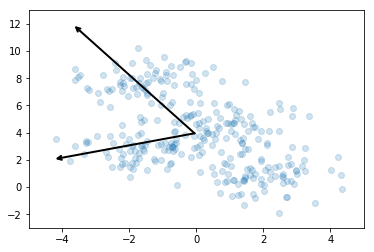

In [64]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
ax = plt.subplot()
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.ylim(-3,13)
plt.xlim(-5,5)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    print(pca.mean_)
    print(pca.mean_ + v)
    draw_vector(pca.mean_, pca.mean_ + v, ax)


the “components” to define the direction of the vector, and the “explained variance” to define the squared-length of the vector 

These vectors represent the principal axes of the data, and the length is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the “principal components” of the data

In [66]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (300, 2)
transformed shape: (300, 1)


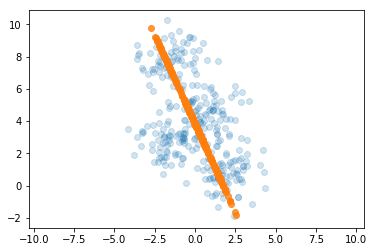

In [67]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');
# Visualization of PCA as dimensionality reduction

This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance

### PCA FOR VISUALIZATION: HANDWRITTEN DIGITS

In [68]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
# the data consists of 8×8 pixel images, meaning that they are 64-dimensional

(1797, 64)

In [70]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


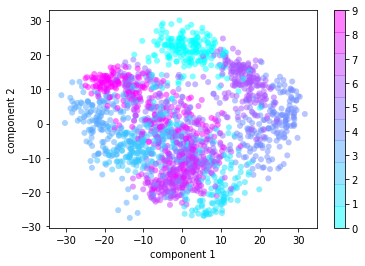

In [74]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('cool', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

these points are the projection of each data point along the directions with the largest variance. we have done this in an unsupervised manner.

### CHOOSING THE NUMBER OF COMPONENTS

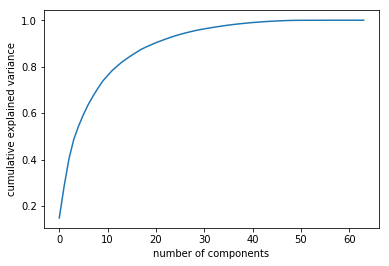

In [75]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we’d need about 20 components to retain 90% of the variance.

### PCA as Noise Filtering

The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.

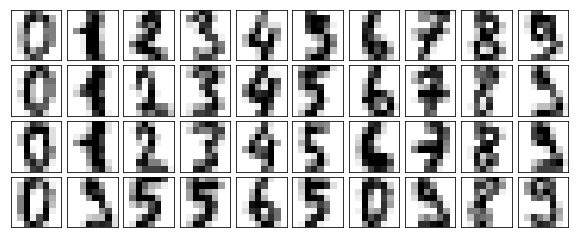

In [76]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

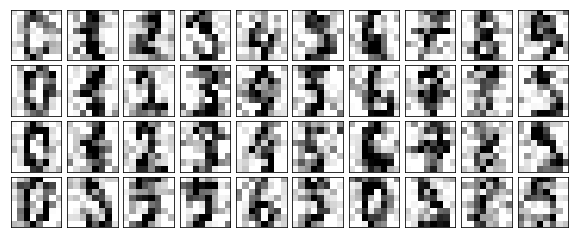

In [80]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [81]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here 50% of the variance amounts to 12 principal components.

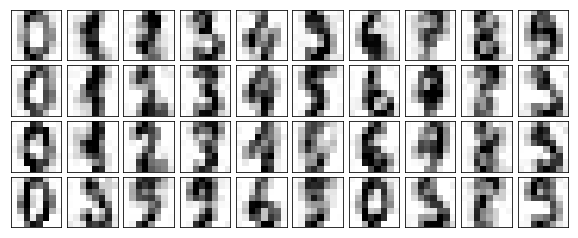

In [82]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Digits “denoised” using PCA

### Example: Eigenfaces

In [83]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


use `RandomizedPCA`—it contains a randomized method to approximate the first `N` principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data. (we have nearly 3000-dimensions)

In [84]:
faces.data.shape

(1348, 2914)

In [86]:
from sklearn.decomposition import PCA
pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [89]:
pca.components_.shape

(150, 2914)

In [90]:
pca.components_[:1]

array([[-0.00579717, -0.00595366, -0.00615767, ..., -0.01000114,
        -0.00901094, -0.0081392 ]], dtype=float32)

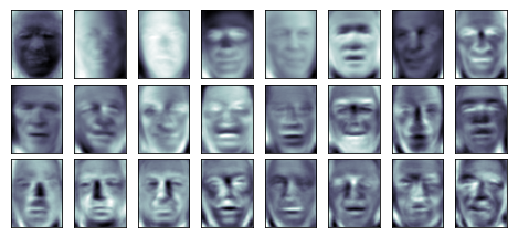

In [87]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

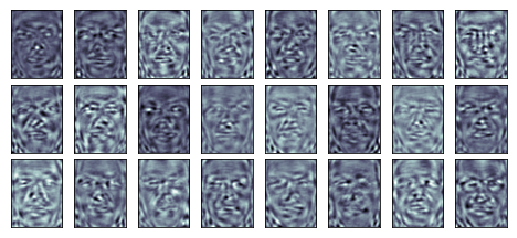

In [93]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[pca.components_.shape[0] - i - 1].reshape(62, 47), cmap='bone')

#### the cumulative variance of these components

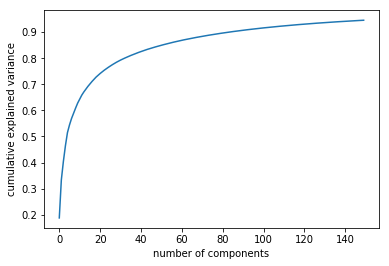

In [91]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.

In [94]:
components = pca.transform(faces.data)

In [98]:
components.shape

(1348, 150)

In [95]:
projected = pca.inverse_transform(components)

In [96]:
projected = pca.inverse_transform(components)

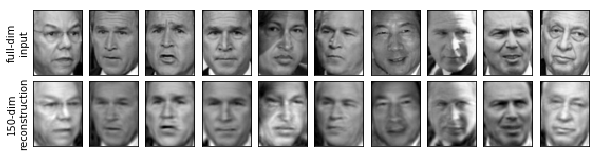

In [97]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

PCA with `randomized`, uses a nondeterministic method to quickly approximate the first few principal components in very high-dimensional data, while `SparsePCA` introduces a regularization term that serves to enforce sparsity of the components.

## In-Depth: Manifold Learning